In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip",'r')
zip_ref.extractall('/content')
zip_ref.close()

In [31]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [10]:
# Generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)




Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
len(train_ds)

625

In [13]:
20000/32 # total batch

625.0

In [14]:
# Normalize (convert pixel value between 0 & 1)

def process(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label

In [15]:
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [17]:
len(train_ds)

625

In [22]:
# Create CNN model

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 128)      

In [25]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=["accuracy"])

In [26]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 59s 83ms/step - loss: 0.6154 - accuracy: 0.6497 - val_loss: 0.5163 - val_accuracy: 0.7550
Epoch 2/10
625/625 [==============================] - 54s 86ms/step - loss: 0.4762 - accuracy: 0.7704 - val_loss: 0.4447 - val_accuracy: 0.7990
Epoch 3/10
625/625 [==============================] - 53s 84ms/step - loss: 0.3749 - accuracy: 0.8303 - val_loss: 0.4357 - val_accuracy: 0.8012
Epoch 4/10
625/625 [==============================] - 53s 84ms/step - loss: 0.2546 - accuracy: 0.8911 - val_loss: 0.5484 - val_accuracy: 0.7804
Epoch 5/10
625/625 [==============================] - 52s 83ms/step - loss: 0.1536 - accuracy: 0.9382 - val_loss: 0.7789 - val_accuracy: 0.7882
Epoch 6/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0926 - accuracy: 0.9661 - val_loss: 0.9163 - val_accuracy: 0.7890
Epoch 7/10
625/625 [==============================] - 52s 82ms/step - loss: 0.0668 - accuracy: 0.9769 - val_loss: 1.0326 - val_accuracy:

In [27]:
model.evaluate(validation_ds)

157/157 [==============================] - 10s 60ms/step - loss: 1.2111 - accuracy: 0.7858


[1.2110618352890015, 0.7857999801635742]

<Axes: >

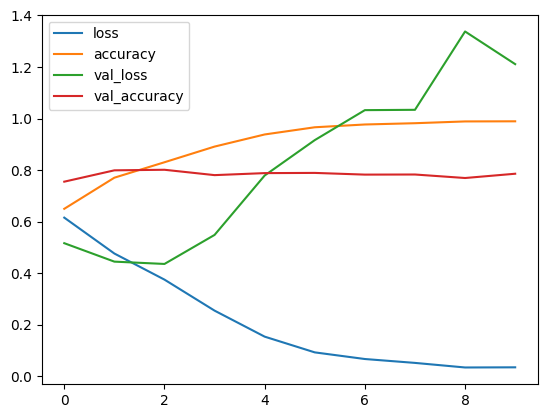

In [30]:
import pandas as pd
pd.DataFrame(history.history).plot()


In [33]:
# Improve our model (Adding batch-normalization,dropout)

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))

model.summary()





Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [34]:
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])


In [35]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 110ms/step - loss: 1.3130 - accuracy: 0.5988 - val_loss: 0.5954 - val_accuracy: 0.6810
Epoch 2/10
625/625 [==============================] - 86s 137ms/step - loss: 0.5592 - accuracy: 0.7145 - val_loss: 0.5625 - val_accuracy: 0.7116
Epoch 3/10
625/625 [==============================] - 69s 109ms/step - loss: 0.4939 - accuracy: 0.7622 - val_loss: 0.8899 - val_accuracy: 0.6062
Epoch 4/10
625/625 [==============================] - 71s 113ms/step - loss: 0.4201 - accuracy: 0.8105 - val_loss: 0.5211 - val_accuracy: 0.7578
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3722 - accuracy: 0.8389 - val_loss: 0.4974 - val_accuracy: 0.7770
Epoch 6/10
625/625 [==============================] - 66s 106ms/step - loss: 0.3129 - accuracy: 0.8653 - val_loss: 0.4612 - val_accuracy: 0.7934
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2219 - accuracy: 0.9082 - val_loss: 0.5205 - val_ac

<Axes: >

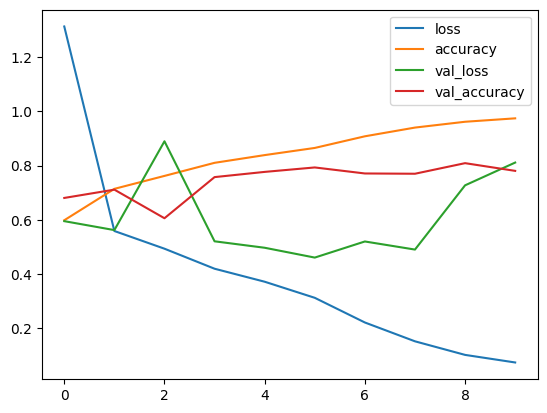

In [56]:
pd.DataFrame(history.history).plot()

In [46]:
# Save model
model.save("cat_dog_cls.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
# load model
from tensorflow.keras.models import load_model
sv_model = load_model("cat_dog_cls.h5")

In [51]:
# Test using custom dataset
import cv2
import matplotlib.pyplot as plt

test_img = cv2.imread("/content/dog.jpg")



(1080, 1920, 3)

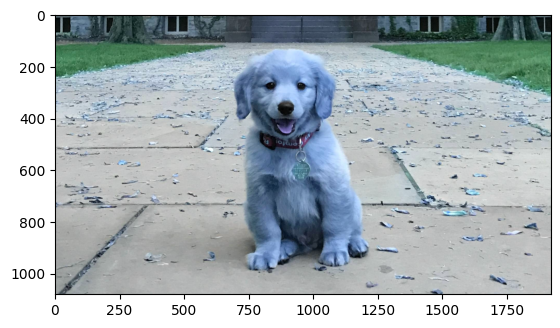

In [52]:
plt.imshow(test_img)
test_img.shape

In [53]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

In [54]:
pred = sv_model.predict(test_input)

1/1 [==============================] - 0s 26ms/step


In [55]:
if(pred == 0.):
  print("Cat")
else:
  print("Dog")

Dog
